# **Phân tích và tiền xử lý dữ liệu**

Cài đặt các thư viện cần thiết để xử lý và trực quan hóa dữ liệu

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Đọc các bộ dữ liệu và lưu vào các biến dataset

In [2]:
shelf_dataset = pd.read_csv("BANG-A-Dataset\\03_Shelf_Information_Data_THPT.csv")
item_dataset = pd.read_csv("BANG-A-Dataset\\03_Item_information_Data_THPT.csv")
customer_dataset = pd.read_csv("BANG-A-Dataset\\03_Customer_Behavior_Data_THPT.csv")

Tổng quan bộ dữ liệu về các quầy hàng, bao gồm mã (ID), tên, kích thước, số lượng sản phẩm, hình dáng.

In [3]:
shelf_dataset

,Shelf ID,Description,Width,Height,Length,Number of items,Shape
0,0,Quầy bánh kẹo,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,100,180,400,18,Kệ hàng
2,2,Quầy sữa,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,500,180,100,19,Kệ hàng
5,5,Quầy gia dụng,700,180,100,16,Kệ hàng
6,6,Quầy sách và đồ chơi,100,180,600,16,Kệ hàng
7,7,Quầy đông lạnh,700,180,100,16,Kệ hàng


Trực quan hóa số lượng sản phẩm xuất hiện trên mỗi quầy hàng.


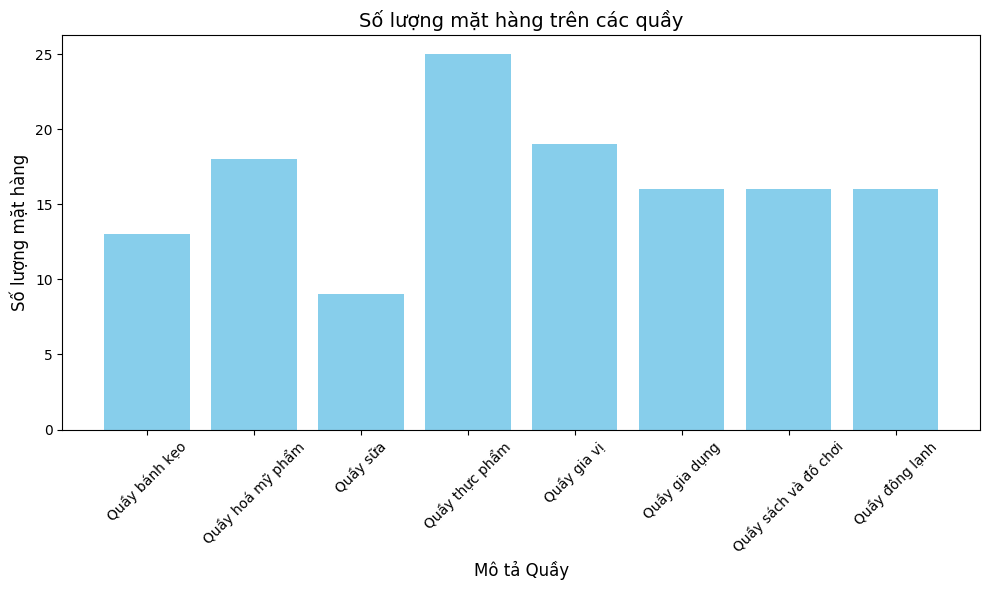

In [4]:
descriptions = shelf_dataset['Description']
number_of_items = shelf_dataset['Number of items']
plt.figure(figsize=(10, 6))
plt.bar(descriptions, number_of_items, color='skyblue')
plt.xlabel('Mô tả Quầy', fontsize=12)
plt.ylabel('Số lượng mặt hàng', fontsize=12)
plt.title('Số lượng mặt hàng trên các quầy', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Bộ dữ liệu về các sản phẩm có trong cửa hàng, bao gồm mẫ kệ, mã sản phẩm, tên, xuất xứ, giá, tình trạng chạy chiến dịch quảng cáo, mức khuyến mãi, đánh giá.

In [5]:
item_dataset

,Shelf ID,Item ID,Name,Origin,Price,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,"17,500 ₫",False,10,4
1,0,1,Bánh Chocopie,Vietnam,"48,000 ₫",False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,"40,000 ₫",False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,"13,400 ₫",False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,"17,000 ₫",True,10,4
...,...,...,...,...,...,...,...,...
129,7,11,Pizza kitkool,Vietnam,"33,000 ₫",False,0,4
130,7,12,Mý ý SG Food,Vietnam,"27,000 ₫",False,0,4
131,7,13,Thanh cua Akira,Nhật Bản,"58,500 ₫",False,0,4
132,7,14,Nước lẩu Barona,Vietnam,"32,000 ₫",False,0,4


Bộ dữ liệu không có dữ liệu bị khuyết

In [6]:
item_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Shelf ID            134 non-null    int64 
 1   Item ID             134 non-null    int64 
 2   Name                134 non-null    object
 3   Origin              134 non-null    object
 4   Price               134 non-null    object
 5   Marketing strategy  134 non-null    bool  
 6   Discount            134 non-null    int64 
 7   Rate                134 non-null    int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 7.6+ KB


Để thuận tiện liên kết những kế quả tìm được sau này, ta sẽ xây dựng các hàm lấy tên và giá (đã qua giảm giá) từ mã kệ và mã sản phẩm (là **độc nhất** đối với mỗi sản phẩm)

In [7]:
#Hàm lấy tên sản phẩm theo ID của kệ hàng và sản phẩm
link_dict = item_dataset.set_index(['Shelf ID', 'Item ID'])['Name'].to_dict()
def get_name(shelf_id, item_id):    
    return link_dict.get((shelf_id, item_id), "Không tìm thấy tên")

In [8]:
#Hàm lấy giá sản phẩm theo ID của kệ hàng và sản phẩm (đã áp dụng khuyến mãi)
price_link_dict = item_dataset.set_index(['Shelf ID', 'Item ID'])['Price'].to_dict()
discount_link_dict = item_dataset.set_index(['Shelf ID', 'Item ID'])['Discount '].to_dict()
def get_price(shelf_id, item_id):    
    price = price_link_dict.get((shelf_id, item_id), "Không tìm thấy tên")
    price = price.replace(',', '').replace(' ₫', '').strip()
    price = int(price)
    price = price * (1-discount_link_dict.get((shelf_id, item_id), 1) /100)
    return price

Bộ dữ liệu được sử dụng chính ở đây là bộ dữ liệu về hành vi mua hàng, được ghi lại bởi (các) camera AI, bao gồm các dữ liệu về mã kệ và sản phẩm, thời gian chính xác xảy ra hành vi, các thông tin cá nhân của người thực hiện hành vi (tuổi, giới tính, hôn nhân, chiều cao, cân nặng) và cụ thể các hành vi: thời gian nhìn và cầm nắm, các biến boolean (true/false) xác định các hành vi cụ thể.

In [9]:
customer_dataset

,Shelf ID,Person ID,Date,Time,Day,Age,Gender,Height,Weight,Married status,Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
0,4,1,2024-07-06,10:00:00,Saturday,52,Female,162,41,Married,16,27,36,True,True,False,False,False,True
1,4,1,2024-07-06,10:02:00,Saturday,52,Female,162,41,Married,5,22,17,True,True,False,True,True,True
2,4,1,2024-07-06,10:05:00,Saturday,52,Female,162,41,Married,4,25,39,True,True,True,True,True,False
3,4,1,2024-07-06,10:06:00,Saturday,52,Female,162,41,Married,8,21,35,True,True,True,False,False,False
4,4,1,2024-07-06,10:08:00,Saturday,52,Female,162,41,Married,6,27,16,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,2024-07-05,3:49:00,Friday,52,Female,154,44,Single,4,32,35,False,True,False,True,True,True
15390,3,1500,2024-07-05,3:54:00,Friday,52,Female,154,44,Single,3,30,28,False,True,False,True,True,True
15391,3,1500,2024-07-05,3:56:00,Friday,52,Female,154,44,Single,21,54,56,False,True,False,False,True,False
15392,3,1500,2024-07-05,3:58:00,Friday,52,Female,154,44,Single,13,16,25,False,True,False,False,True,True


Bộ dữ liệu đầy đủ, không có dữ liệu thiếu sót trừ 3 cột cuối về hành vi cho sản phẩm vào túi, cho ra và cho lại vào lần 2.

In [10]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Shelf ID                               15394 non-null  int64 
 1   Person ID                              15394 non-null  int64 
 2   Date                                   15394 non-null  object
 3   Time                                   15394 non-null  object
 4   Day                                    15394 non-null  object
 5   Age                                    15394 non-null  int64 
 6   Gender                                 15394 non-null  object
 7   Height                                 15394 non-null  int64 
 8   Weight                                 15394 non-null  int64 
 9   Married status                         15394 non-null  object
 10  Item ID                                15394 non-null  int64 
 11  Looking at item

Ta điền các dữ liệu bị thiếu (tất cả là boolean) bằng giá trị **False**

In [11]:
#Các dữ liệu thiếu đều là các hành vi, với kiểu dữ liệu Boolean, do đó, ta sẽ thay chúng bằng False
customer_dataset = customer_dataset.fillna(False)

# **Câu 1**
## Thống kê 5 mặt hàng với lượng khách hàng nhìn thấy nhiều nhất.

Ta nhóm các cặp Shelf ID - Item ID với mỗi sản phẩm (là một song ánh) và thực hiện đếm mỗi cặp này và sắp xếp cho ra kết quả.

In [12]:
# Nhóm theo cặp (Shelf ID, Item ID) và đếm số lần xuất hiện
count_item = customer_dataset.groupby(['Shelf ID', 'Item ID']).size().reset_index(name='Count')
#Sắp xếp và lọc chọn 5 sản phẩm nhiều nhất
top_5_ex1 = count_item.sort_values(by='Count', ascending=False).head(5).reset_index()
# Hiển thị kết quả
print('Thống kê 5 mặt hàng với lượng khách hàng nhìn thấy nhiều nhất:')
for index, row in top_5_ex1.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. Sản phẩm: {get_name(shelf_id, item_id)}, mã kệ hàng: {shelf_id}, mã sản phẩm: {item_id}, lượt nhìn: {count}")
# Điền form trả lời
print('Điền trong form:')
for index, row in top_5_ex1.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. {get_name(shelf_id, item_id)}")

Thống kê 5 mặt hàng với lượng khách hàng nhìn thấy nhiều nhất:
1. Sản phẩm: Snack khoai tây Lays, mã kệ hàng: 0, mã sản phẩm: 7, lượt nhìn: 235
2. Sản phẩm: Bim bim Oishi, mã kệ hàng: 0, mã sản phẩm: 6, lượt nhìn: 233
3. Sản phẩm: 4 hộp sữa lúa mạch Milo 180ml, mã kệ hàng: 2, mã sản phẩm: 2, lượt nhìn: 233
4. Sản phẩm: Sữa ông thọ, mã kệ hàng: 2, mã sản phẩm: 8, lượt nhìn: 232
5. Sản phẩm: Bánh trứng Custard, mã kệ hàng: 0, mã sản phẩm: 4, lượt nhìn: 230
Điền trong form:
1. Snack khoai tây Lays
2. Bim bim Oishi
3. 4 hộp sữa lúa mạch Milo 180ml
4. Sữa ông thọ
5. Bánh trứng Custard


# **Câu 2**
## Thống kê 5 mặt hàng có tổng thời gian nhìn và cầm xem lâu nhất.

Tương tự với Câu 1, ta tính tổng thời gian nhìn và cầm rồi sắp xếp

In [13]:
#Tính tổng thời gian nhìn và cầm của mỗi lượt khác
looking_holding_total_time_dataset = customer_dataset
pd.options.mode.chained_assignment = None # tắt cảnh báo gán giá trị
looking_holding_total_time_dataset['total_time'] = looking_holding_total_time_dataset['Looking at item (s)'] + looking_holding_total_time_dataset['Holding the item (s)']
#Tính tổng thời gian nhìn và cầm của mỗi sản phẩm
looking_holding_total_time_dataset = looking_holding_total_time_dataset.groupby(['Shelf ID', 'Item ID'])['total_time'].sum().reset_index()
top_5_ex2 =looking_holding_total_time_dataset.sort_values(by='total_time', ascending=False).head(5).reset_index()
#In ra kết quả
print('Thống kê 5 mặt hàng có tổng thời gian nhìn và cầm xem lâu nhất:')
for index, row in top_5_ex2.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    total_time = row['total_time']
    print(f"{order}. Sản phẩm: {get_name(shelf_id, item_id)}, mã kệ hàng: {shelf_id}, mã sản phẩm: {item_id}, thời gian nhìn và cầm: {total_time} giây")
#Điền vào form
print('Điền vào form:')
for index, row in top_5_ex2.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    total_time = row['total_time']
    print(f"{order}. {get_name(shelf_id, item_id)}")

Thống kê 5 mặt hàng có tổng thời gian nhìn và cầm xem lâu nhất:
1. Sản phẩm: Sữa chua uống Yakult, mã kệ hàng: 7, mã sản phẩm: 6, thời gian nhìn và cầm: 22896 giây
2. Sản phẩm: Sữa chua uống Probi, mã kệ hàng: 7, mã sản phẩm: 7, thời gian nhìn và cầm: 22896 giây
3. Sản phẩm: Sữa ông thọ, mã kệ hàng: 2, mã sản phẩm: 8, thời gian nhìn và cầm: 13939 giây
4. Sản phẩm: Bim bim Oishi, mã kệ hàng: 0, mã sản phẩm: 6, thời gian nhìn và cầm: 13866 giây
5. Sản phẩm: Snack khoai tây Lays, mã kệ hàng: 0, mã sản phẩm: 7, thời gian nhìn và cầm: 13362 giây
Điền vào form:
1. Sữa chua uống Yakult
2. Sữa chua uống Probi
3. Sữa ông thọ
4. Bim bim Oishi
5. Snack khoai tây Lays


# **Câu 3**
## Thống kê 5 mặt hàng được mua nhiều nhất.

Ta xem xét các chuỗi hàng động được ghi lại có trong bộ dữ liệu.

In [14]:
#Phân tích các chuỗi hành vi khi mua hàng
purchasing_behavior = customer_dataset[['Holding the bag',	'Picking up item','Returning item',	'Putting item into bag'	,'Taking item out of bag',	'Putting item into bag in the 2nd time']]
count_behavior = purchasing_behavior.groupby(['Holding the bag',	'Picking up item','Returning item',	'Putting item into bag'	,'Taking item out of bag',	'Putting item into bag in the 2nd time']).size().reset_index(name='Count')
count_behavior

,Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Count
0,False,True,False,False,False,False,93
1,False,True,False,False,False,True,69
2,False,True,False,False,True,False,71
3,False,True,False,False,True,True,50
4,False,True,False,True,False,False,154
5,False,True,False,True,False,True,89
6,False,True,False,True,True,False,83
7,False,True,False,True,True,True,79
8,False,True,True,False,False,False,134
9,False,True,True,False,False,True,86


Trong thực tế có 2^6 khả năng về chuỗi hành vi nhưng trong bộ dữ liệu chỉ có 40 chuỗi hành vi khác nhau khi mua hàng. Ta sẽ đi loại bỏ các chuỗi hành động mua hàng không hợp lý, cụ thể, loại bỏ những trường hợp sau:

1. Không đem túi (Holding the bag = False) nhưng vẫn cho hàng vào được túi (Putting item into bag = True).
2. Không cầm sản phẩm lên (Picking up item = False) nhưng vẫn để lại sản phẩm vào chỗ cũ (Returning item = True).
3. Không cho sản phẩm vào túi (Putting item into bag = False) nhưng lại lấy sản phẩm từ túi ra (Taking item out of bag = True).
4. Không cho vào túi lần đầu (Putting item into bag = False) nhưng cho vào túi lần hai (Putting item into bag in the 2nd time). 
5. Để lại sản phẩm nhưng vẫn cho sản phẩm vào trong túi.
6. Để lại sản phẩm những bỏ sản phẩm từ túi ra ngoài.
7. Không cầm sản phẩm nhưng vẫn để sản phẩm vào túi.
8. Không cầm sản phẩm những vẫn để sản phẩm từ túi ra ngoài.
9. Không trả sản phẩm vào kệ những vẫn lấy ra lần hai

In [15]:
behavior = count_behavior[~((count_behavior['Holding the bag'] == False) & (count_behavior['Putting item into bag'] == True))]
behavior = behavior[~((behavior['Holding the bag'] == False) & (behavior['Putting item into bag in the 2nd time'] == True))]
behavior = behavior[~((behavior['Picking up item'] == False) & (behavior['Returning item'] == True))]
behavior = behavior[~((behavior['Putting item into bag'] == False) & (behavior['Taking item out of bag'] == True))]
behavior = behavior[~((behavior['Putting item into bag'] == False) & (behavior['Putting item into bag in the 2nd time'] == True))]
behavior = behavior[~((behavior['Returning item'] == True) & (behavior['Putting item into bag'] == True))]
behavior = behavior[~((behavior['Returning item'] == True) & (behavior['Taking item out of bag'] == True))]
behavior = behavior[~((behavior['Picking up item'] == False) & (behavior['Putting item into bag'] == True))]
behavior = behavior[~((behavior['Picking up item'] == False) & (behavior['Taking item out of bag'] == True))]
behavior.reset_index()

,index,Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Count
0,0,False,True,False,False,False,False,93
1,8,False,True,True,False,False,False,134
2,16,True,False,False,False,False,False,3
3,26,True,True,False,False,False,False,1050
4,30,True,True,False,True,False,False,1916
5,31,True,True,False,True,False,True,1295
6,32,True,True,False,True,True,False,921
7,33,True,True,False,True,True,True,930
8,34,True,True,True,False,False,False,1362


Trên đây, còn 9 trường hợp có thể xảy ra trong thực tế:
1. Không cầm theo túi, cầm sản phẩm lên và không để lại -> Mua
2. Không cầm theo túi, cầm sản phẩm lên và để lại -> Không mua
3. Cầm theo túi nhưng không động vào sản phẩm -> Không mua
4. Cầm theo túi, cầm sản phẩm lên và không để lại, không để vào trong túi -> Mua
5. Cầm theo túi, cầm sản phẩm lên rồi để vào trong túi -> Mua
6. Cầm theo túi, cầm sản phẩm lên, để vào trong túi, rồi để sản phẩm vào túi lần 2 -> Mua
7. Cầm theo túi, cầm sản phầm lên, để vào trong túi, rồi bỏ sản phầm từ túi ra -> Không mua
8. Cầm theo túi, cầm sản phẩm lên, để vào trong túi, rồi lại bỏ ra, rồi để vào trong túi lần 2 -> Mua
9. Cầm theo túi, cầm sản phẩm lên, để sản phẩm lại -> Không mua

Áp dụng vào bộ dữ liệu 

In [16]:
#Áp dụng vào purchase_customer_dataset
purchase_customer_dataset = customer_dataset[~((customer_dataset['Holding the bag'] == False) & (customer_dataset['Putting item into bag'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Holding the bag'] == False) & (purchase_customer_dataset['Putting item into bag in the 2nd time'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Picking up item'] == False) & (purchase_customer_dataset['Returning item'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Putting item into bag'] == False) & (purchase_customer_dataset['Taking item out of bag'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Putting item into bag'] == False) & (purchase_customer_dataset['Putting item into bag in the 2nd time'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Returning item'] == True) & (purchase_customer_dataset['Putting item into bag'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Returning item'] == True) & (purchase_customer_dataset['Taking item out of bag'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Picking up item'] == False) & (purchase_customer_dataset['Putting item into bag'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Picking up item'] == False) & (purchase_customer_dataset['Taking item out of bag'] == True))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Picking up item'] == False) & (purchase_customer_dataset['Taking item out of bag'] == True))]

Sau đó, ta lọc đi những trường hợp là không mua

In [17]:
# Lọc những trường hợp xét là không mua
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Holding the bag'] == False) & (purchase_customer_dataset['Picking up item'] == True)& (purchase_customer_dataset['Returning item'] == True)& (purchase_customer_dataset['Putting item into bag'] == False)& (purchase_customer_dataset['Taking item out of bag'] == False)& (purchase_customer_dataset['Putting item into bag in the 2nd time'] == False))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Holding the bag'] == True) & (purchase_customer_dataset['Picking up item'] == False)& (purchase_customer_dataset['Returning item'] == False)& (purchase_customer_dataset['Putting item into bag'] == False)& (purchase_customer_dataset['Taking item out of bag'] == False)& (purchase_customer_dataset['Putting item into bag in the 2nd time'] == False))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Holding the bag'] == True) & (purchase_customer_dataset['Picking up item'] == True)& (purchase_customer_dataset['Returning item'] == False)& (purchase_customer_dataset['Putting item into bag'] == True)& (purchase_customer_dataset['Taking item out of bag'] == True)& (purchase_customer_dataset['Putting item into bag in the 2nd time'] == False))]
purchase_customer_dataset = purchase_customer_dataset[~((purchase_customer_dataset['Holding the bag'] == True) & (purchase_customer_dataset['Picking up item'] == True)& (purchase_customer_dataset['Returning item'] == True)& (purchase_customer_dataset['Putting item into bag'] == False)& (purchase_customer_dataset['Taking item out of bag'] == False)& (purchase_customer_dataset['Putting item into bag in the 2nd time'] == False))]


Còn lại là những trường hợp mua, ta chỉ cần áp dụng thuật toán đếm như ở câu trước là có kết quả

In [18]:
# Đếm các sản phẩm được mua
count_item_purchased = purchase_customer_dataset.groupby(['Shelf ID', 'Item ID']).size().reset_index(name='Count')
top_5_ex3 = count_item_purchased.sort_values(by='Count', ascending=False).head(5).reset_index()
print('Thống kê 5 mặt hàng được mua nhiều nhất:')
for index, row in top_5_ex3.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. Sản phẩm: {get_name(shelf_id, item_id)}, mã kệ hàng: {shelf_id}, mã sản phẩm: {item_id}, lượt mua: {count}")
# Điền form trả lời
print('Điền trong form:')
for index, row in top_5_ex3.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. {get_name(shelf_id, item_id)}")

Thống kê 5 mặt hàng được mua nhiều nhất:
1. Sản phẩm: Lốc 4 hộp sữa tươi ít đường TH true MILK, mã kệ hàng: 2, mã sản phẩm: 1, lượt mua: 175
2. Sản phẩm: Bánh trứng Custard, mã kệ hàng: 0, mã sản phẩm: 4, lượt mua: 156
3. Sản phẩm: Kem tràng tiền, mã kệ hàng: 7, mã sản phẩm: 0, lượt mua: 155
4. Sản phẩm: Sữa bột Milo, mã kệ hàng: 2, mã sản phẩm: 7, lượt mua: 144
5. Sản phẩm: Tã dán Merries size NB 76 miếng (dưới 5kg), mã kệ hàng: 1, mã sản phẩm: 13, lượt mua: 124
Điền trong form:
1. Lốc 4 hộp sữa tươi ít đường TH true MILK
2. Bánh trứng Custard
3. Kem tràng tiền
4. Sữa bột Milo
5. Tã dán Merries size NB 76 miếng (dưới 5kg)


# **Câu 4**
## Thống kê 5 mặt hàng thường được cầm lên rồi trả lại nhiều nhất.

Ta lọc các trường hợp có giá trị Picking up item và Returning Item đều bằng True và áp dụng thuật toán sắp xếp.

In [19]:
pickup_return_dataset = customer_dataset[(customer_dataset['Picking up item'] == True)&(customer_dataset['Returning item']==True)]
pickup_return_dataset.reset_index()
# Đếm các sản phẩm cầm lên rồi trả lại
count_item_return = pickup_return_dataset.groupby(['Shelf ID', 'Item ID']).size().reset_index(name='Count')
top_5_ex4 = count_item_return.sort_values(by='Count', ascending=False).head(5).reset_index()
print('Thống kê 5 mặt hàng được cầm lên và trả lại nhiều nhất:')
for index, row in top_5_ex4.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. Sản phẩm: {get_name(shelf_id, item_id)}, mã kệ hàng: {shelf_id}, mã sản phẩm: {item_id}, lượt trả: {count}")
# Điền form trả lời, để ý là có 2 món ở vị trí top 5
print('Điền trong form:')
for index, row in top_5_ex4.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. {get_name(shelf_id, item_id)}")

Thống kê 5 mặt hàng được cầm lên và trả lại nhiều nhất:
1. Sản phẩm: 4 hộp sữa lúa mạch Milo 180ml, mã kệ hàng: 2, mã sản phẩm: 2, lượt trả: 134
2. Sản phẩm: Snack khoai tây Lays, mã kệ hàng: 0, mã sản phẩm: 7, lượt trả: 127
3. Sản phẩm: Mý ý SG Food, mã kệ hàng: 7, mã sản phẩm: 12, lượt trả: 117
4. Sản phẩm: Nước lẩu Barona, mã kệ hàng: 7, mã sản phẩm: 14, lượt trả: 116
5. Sản phẩm: Sữa chua Vinamik, mã kệ hàng: 7, mã sản phẩm: 2, lượt trả: 114
Điền trong form:
1. 4 hộp sữa lúa mạch Milo 180ml
2. Snack khoai tây Lays
3. Mý ý SG Food
4. Nước lẩu Barona
5. Sữa chua Vinamik


# **Câu 5**
## Các nhóm khách hàng theo độ tuổi mua mặt hàng nào nhiều nhất?

Ta chia bộ dữ liệu thành 3 nhóm tuổi rồi sắp xếp

In [20]:
age_customer_dataset = purchase_customer_dataset
age_customer_dataset['age_group'] = np.where((age_customer_dataset['Age'] >= 18) & (age_customer_dataset['Age']<=30), 'Teenager',
                                            np.where((age_customer_dataset['Age'] >= 31) & (age_customer_dataset['Age']<=60), 'Middle-aged',
                                            np.where(age_customer_dataset['Age'] >= 61, 'Elder','' )))
def find_bestsell_item_by_age(df):
    count_item = df.groupby(['Shelf ID', 'Item ID']).size().reset_index(name='Count')
    bestsell = count_item.sort_values(by='Count', ascending=False).head(1).reset_index()
    for index, row in bestsell.iterrows():
        order = index + 1
        shelf_id = row['Shelf ID']
        item_id = row['Item ID']
        count = row['Count']
        print(f"{get_name(shelf_id, item_id)}")

teenager_customer_dataset = age_customer_dataset[(age_customer_dataset['age_group'] == 'Teenager')]
middle_aged_customer_dataset = age_customer_dataset[(age_customer_dataset['age_group'] == 'Middle-aged')]
elder_customer_dataset = age_customer_dataset[(age_customer_dataset['age_group'] == 'Elder')]
print('Thiếu niên:')
find_bestsell_item_by_age(teenager_customer_dataset)
print('Trung niên:')
find_bestsell_item_by_age(middle_aged_customer_dataset)
print('Người già:')
find_bestsell_item_by_age(elder_customer_dataset)

Thiếu niên:
Lốc 4 hộp sữa tươi ít đường TH true MILK
Trung niên:
Kem tràng tiền
Người già:
Lốc 4 hộp sữa tươi ít đường TH true MILK


# **Câu 6**
# Ngày nào trong tuần có doanh thu cao nhất?

Ta chia dữ liệu theo ngày rồi áp dụng hàm tính doanh thu rồi so sánh.

In [21]:
best_of_week = purchase_customer_dataset
def revenue_day(day):
    df = best_of_week[(best_of_week['Day'] == day)]
    count_item = df.groupby(['Shelf ID', 'Item ID']).size().reset_index(name='Count')
    revenue = 0
    for index, row in count_item.iterrows():
        shelf_id = row['Shelf ID']
        item_id = row['Item ID']
        count = row['Count']
        revenue = revenue + get_price(shelf_id,item_id) * count
    return revenue
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
max_revenue = 0
for day in week:
    if revenue_day(day) > max_revenue:
        max_revenue = revenue_day(day)
        max_revenue_day = day
print(f"Ngày có doanh thu cao nhất là: {max_revenue_day}")
    

Ngày có doanh thu cao nhất là: Saturday


# **Câu 7**
## Nhóm tuổi nào có số người đi siêu thị nhiều nhất?

Áp dụng hàm đếm vào các nhóm tuổi

In [22]:
age_customer_dataset = customer_dataset[['Person ID', 'Age']].groupby(['Person ID', "Age"]).size().reset_index(name='Count')
age_customer_dataset['age_group'] = np.where((age_customer_dataset['Age'] >= 18) & (age_customer_dataset['Age']<=30), 'Teenager',
                                            np.where((age_customer_dataset['Age'] >= 31) & (age_customer_dataset['Age']<=60), 'Middle-aged',
                                            np.where(age_customer_dataset['Age'] >= 61, 'Elder','' )))
age_customer_dataset = age_customer_dataset.drop('Count', axis =1)
age_customer_dataset['age_group'].value_counts()

age_group
Middle-aged    753
Elder          408
Teenager       339
Name: count, dtype: int64

# **Câu 8**
## Top 5 các mặt hàng giảm giá được người dùng mua nhiều nhất.

In [23]:
discount_item_dataset = item_dataset[item_dataset['Discount '] != 0]
discount_name_link_dict = discount_item_dataset.set_index(['Shelf ID', 'Item ID'])['Name'].to_dict()
def get_discount_name(shelf_id, item_id):    
    return discount_name_link_dict.get((shelf_id, item_id), pd.NA)
# discount_purchase_item_dataset = purchase_customer_dataset[(get_discount_name(purchase_customer_dataset['Shelf ID'],purchase_customer_dataset['Item ID']) != 'NaN')]
discount_purchase_customer_dataset = purchase_customer_dataset[
    purchase_customer_dataset.apply(lambda row: pd.notna(get_discount_name(row['Shelf ID'], row['Item ID'])), axis=1)
]
# Đếm các sản phẩm giảm giá được mua
count_discount_item_purchased = discount_purchase_customer_dataset.groupby(['Shelf ID', 'Item ID']).size().reset_index(name='Count')
top_5_ex8 = count_discount_item_purchased.sort_values(by='Count', ascending=False).head(5).reset_index()
print('Thống kê 5 mặt hàng giảm giá được mua nhiều nhất:')
for index, row in top_5_ex8.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. Sản phẩm: {get_name(shelf_id, item_id)}, mã kệ hàng: {shelf_id}, mã sản phẩm: {item_id}, lượt mua: {count}")
# Điền form trả lời
print('Điền trong form:')
for index, row in top_5_ex8.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. {get_name(shelf_id, item_id)}")

Thống kê 5 mặt hàng giảm giá được mua nhiều nhất:
1. Sản phẩm: Bánh trứng Custard, mã kệ hàng: 0, mã sản phẩm: 4, lượt mua: 156
2. Sản phẩm: Kem tràng tiền, mã kệ hàng: 7, mã sản phẩm: 0, lượt mua: 155
3. Sản phẩm: Sữa bột Milo, mã kệ hàng: 2, mã sản phẩm: 7, lượt mua: 144
4. Sản phẩm: Dầu gội Romano, mã kệ hàng: 1, mã sản phẩm: 1, lượt mua: 101
5. Sản phẩm: Khăn mặt Shine, mã kệ hàng: 1, mã sản phẩm: 11, lượt mua: 91
Điền trong form:
1. Bánh trứng Custard
2. Kem tràng tiền
3. Sữa bột Milo
4. Dầu gội Romano
5. Khăn mặt Shine


# **Câu 9**
## Top 3 quầy hàng nào có lượt cầm xem nhiều nhất?

In [24]:
# Nhóm theo cặp (Shelf ID, Item ID) và đếm số lần xuất hiện
count_shelf = customer_dataset.groupby(['Shelf ID']).size().reset_index(name='Count')
#Sắp xếp và lọc chọn 5 sản phẩm nhiều nhất
top_3_ex9 = count_shelf.sort_values(by='Count', ascending=False).head(3).reset_index()
# Hiển thị kết quả
print('Thống kê 3 quầy hàng có lượt xem cao nhất:')
for index, row in top_3_ex9.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    count = row['Count']
    print(f"{order}. Quầy hàng: {shelf_id}, lượt nhìn: {count}")
# Điền form trả lời
print('Điền trong form:')
for index, row in top_3_ex9.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    count = row['Count']
    print(f"{order}. Quầy {shelf_id}")

Thống kê 3 quầy hàng có lượt xem cao nhất:
1. Quầy hàng: 7, lượt nhìn: 3305
2. Quầy hàng: 0, lượt nhìn: 2789
3. Quầy hàng: 1, lượt nhìn: 2363
Điền trong form:
1. Quầy 7
2. Quầy 0
3. Quầy 1


# **Câu 10**
## Trong số các sản phẩm được đánh giá cao nhất, top 3 sản phẩm nào được mua nhiều nhất?

In [25]:
high_rate_item_dataset = item_dataset[item_dataset['Rate'] == 5]
high_rate_item_dict = high_rate_item_dataset.set_index(['Shelf ID', 'Item ID'])['Name'].to_dict()
def get_high_rate_name(shelf_id, item_id):    
    return high_rate_item_dict.get((shelf_id, item_id), pd.NA)
high_rate_customer_dataset = purchase_customer_dataset[
    purchase_customer_dataset.apply(lambda row: pd.notna(get_high_rate_name(row['Shelf ID'], row['Item ID'])), axis=1)
]
# Đếm các sản phẩm giảm giá được mua
count_high_rate_item_purchased = high_rate_customer_dataset.groupby(['Shelf ID', 'Item ID']).size().reset_index(name='Count')
top_3_ex10 = count_high_rate_item_purchased.sort_values(by='Count', ascending=False).head(3).reset_index()
print('Thống kê 5 mặt hàng đánh giá 5 mua nhiều nhất:')
for index, row in top_3_ex10.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. Sản phẩm: {get_name(shelf_id, item_id)}, mã kệ hàng: {shelf_id}, mã sản phẩm: {item_id}, lượt mua: {count}")
# Điền form trả lời
print('Điền trong form:')
for index, row in top_3_ex10.iterrows():
    order = index + 1
    shelf_id = row['Shelf ID']
    item_id = row['Item ID']
    count = row['Count']
    print(f"{order}. {get_name(shelf_id, item_id)}")

Thống kê 5 mặt hàng đánh giá 5 mua nhiều nhất:
1. Sản phẩm: Kem tràng tiền, mã kệ hàng: 7, mã sản phẩm: 0, lượt mua: 155
2. Sản phẩm: Khăn mặt Shine, mã kệ hàng: 1, mã sản phẩm: 11, lượt mua: 91
3. Sản phẩm: Khăn tắm Shine, mã kệ hàng: 1, mã sản phẩm: 10, lượt mua: 88
Điền trong form:
1. Kem tràng tiền
2. Khăn mặt Shine
3. Khăn tắm Shine


# **Câu 11**
## Tìm ra mặt hàng hay được chú ý nhất của những nhóm khách hàng cụ thể

### **Các nhóm giới tính**

In [33]:
customer_dataset['Name'] = customer_dataset.apply(lambda row: get_name(row['Shelf ID'], row['Item ID']), axis=1)
customer_dataset['total_time'] = customer_dataset['Looking at item (s)'] + customer_dataset['Holding the item (s)']

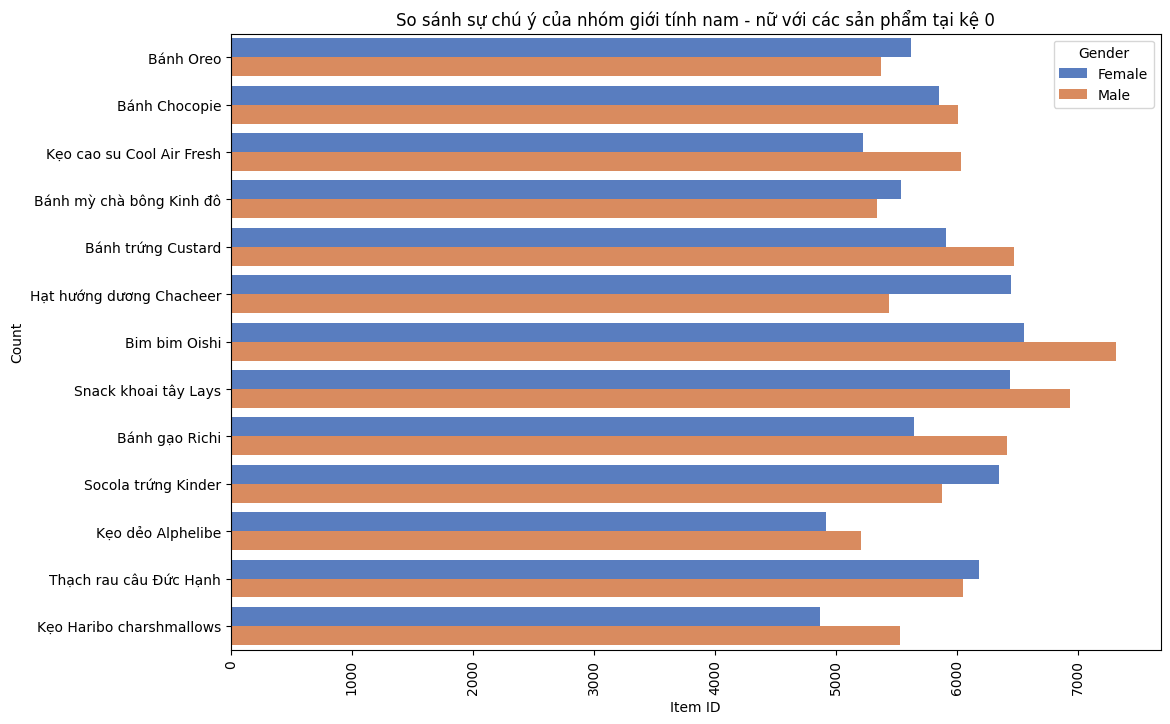

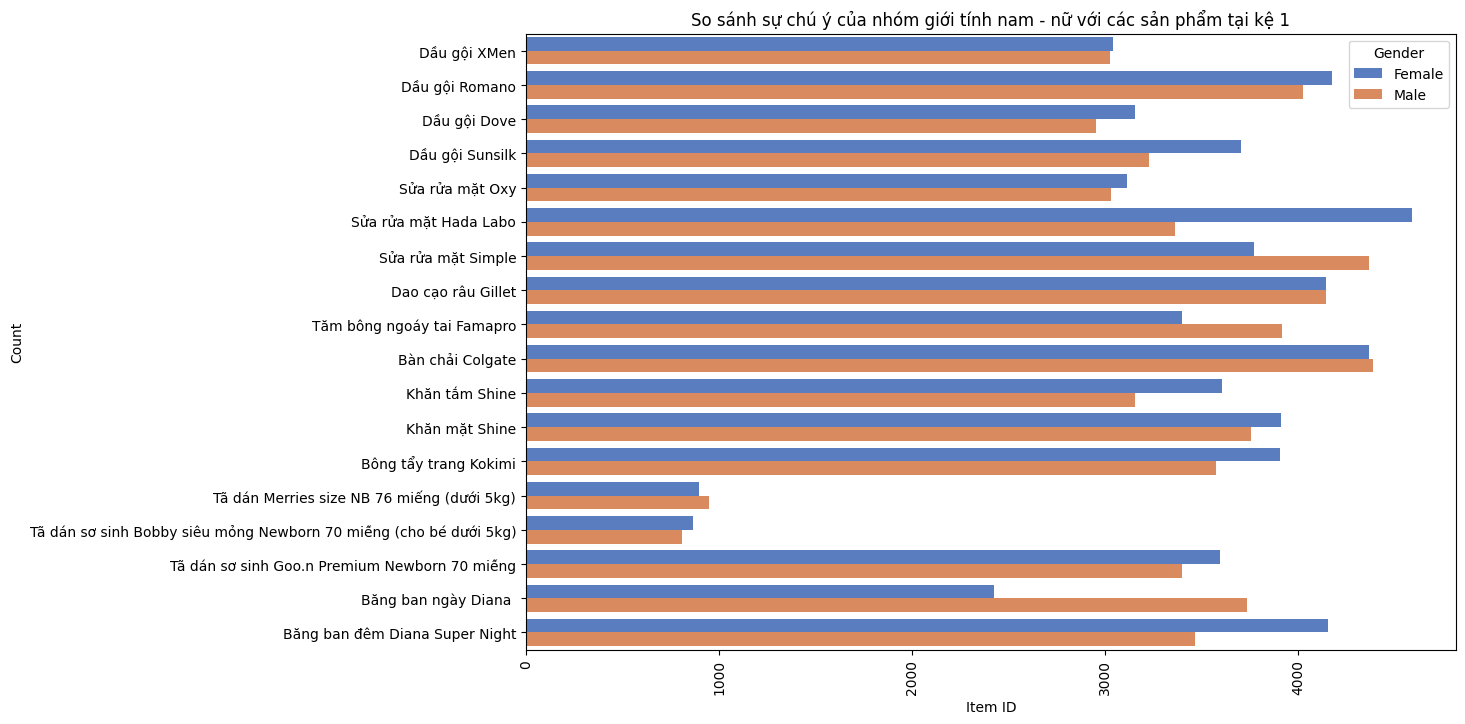

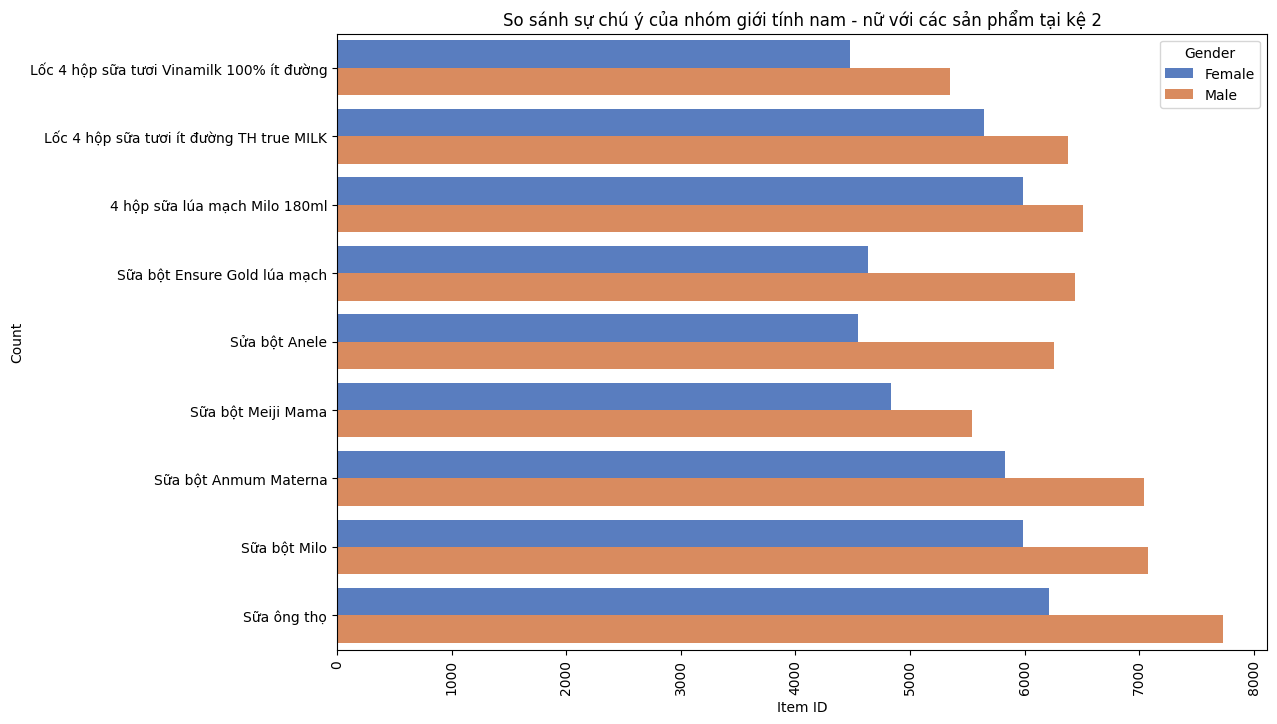

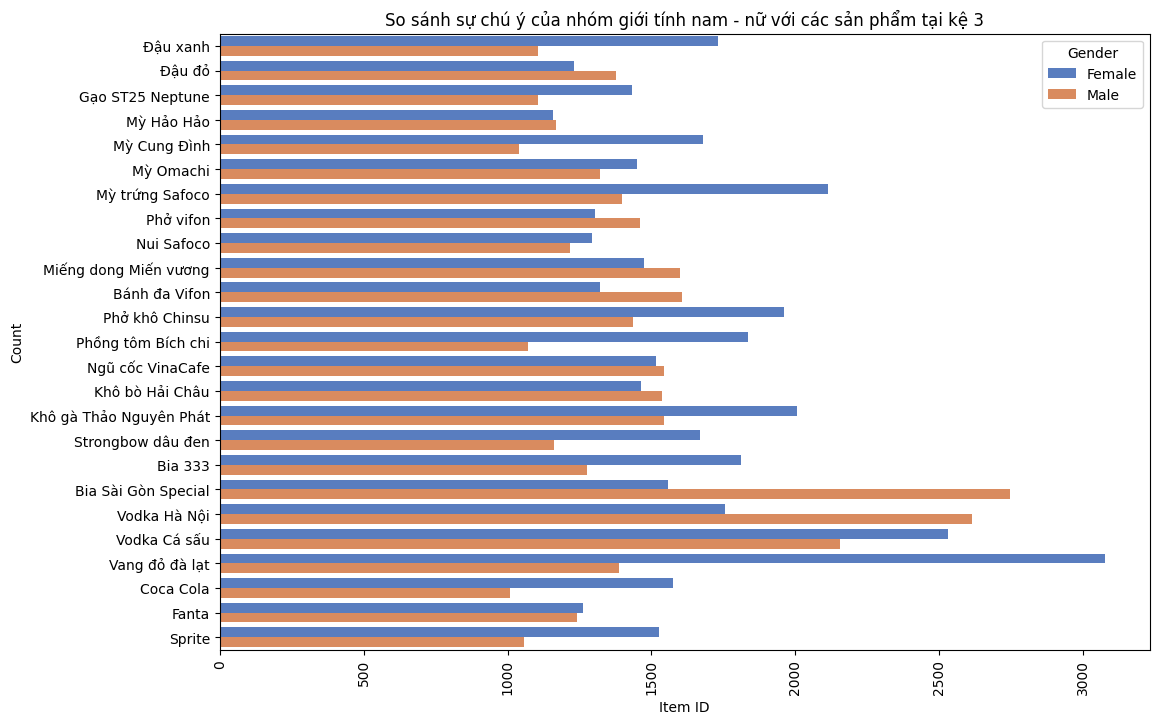

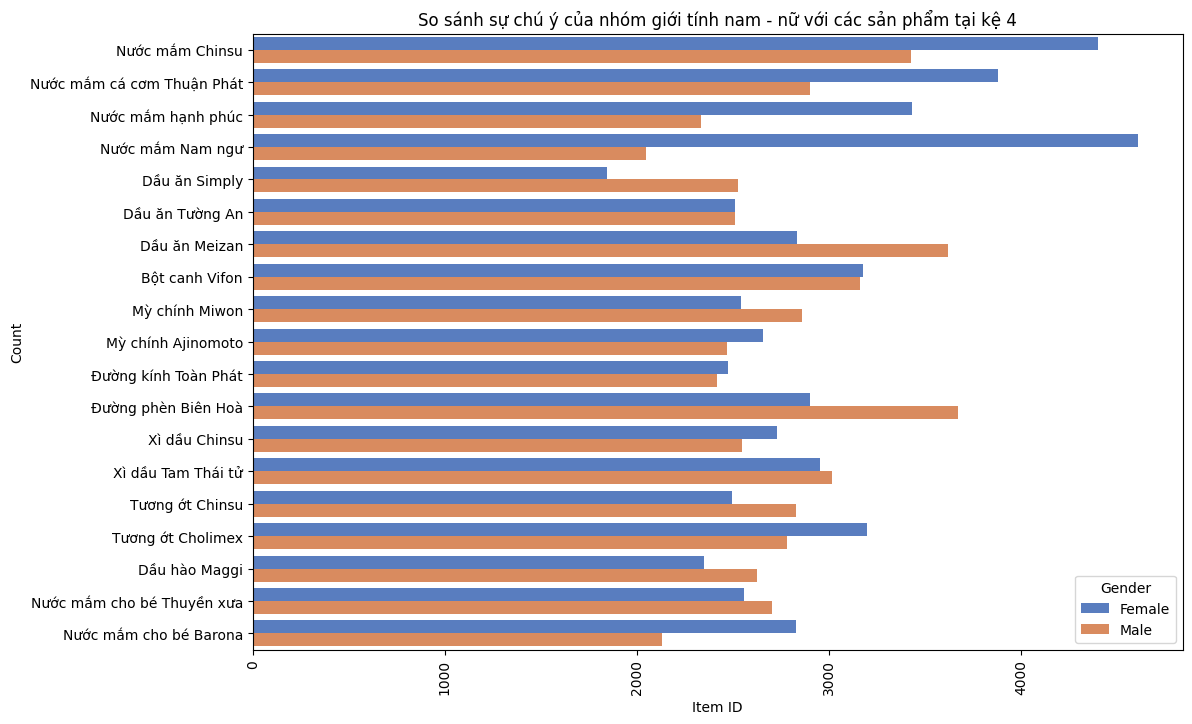

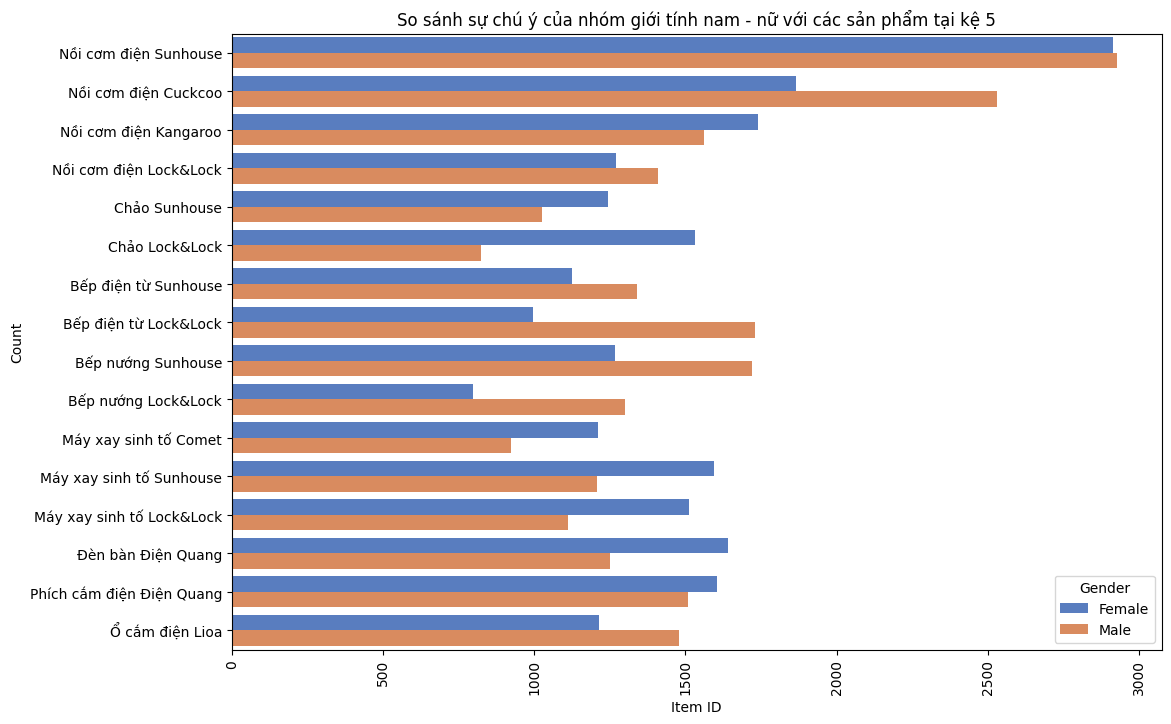

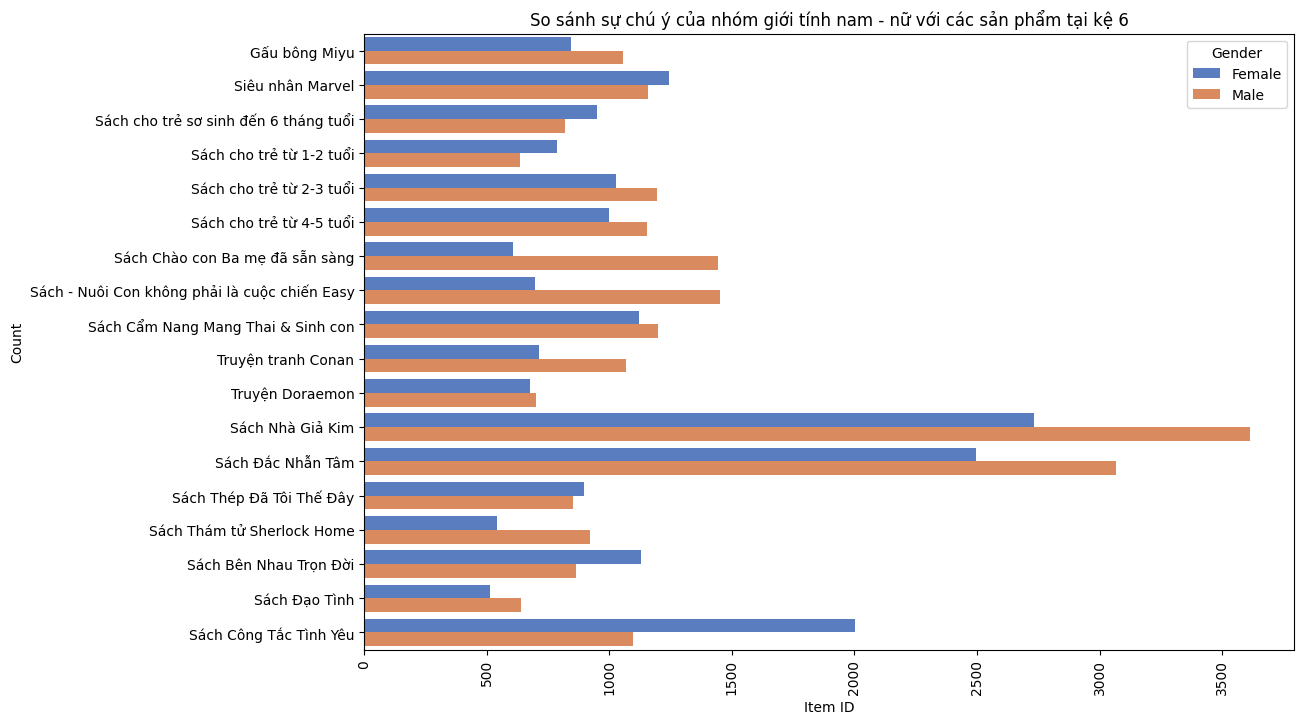

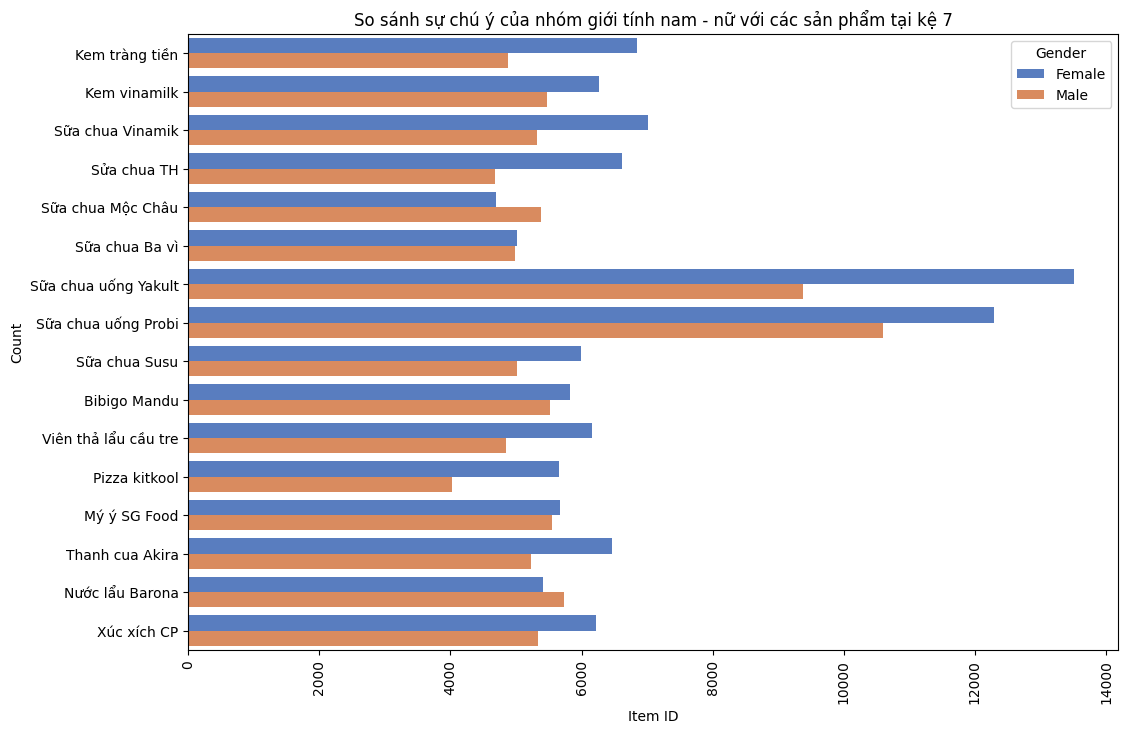

In [48]:
for i in range(8):
    gender_count_item = customer_dataset[customer_dataset['Shelf ID']== i]
    gender_count_item = gender_count_item.groupby(['Shelf ID', 'Item ID', 'Gender', 'Name'])['total_time'].sum().reset_index()
    # Tạo biểu đồ
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=90)
    sns.barplot(data=gender_count_item, y='Name', x='total_time', hue='Gender', palette='muted', ci = None)
    plt.title(f'So sánh sự chú ý của nhóm giới tính nam - nữ với các sản phẩm tại kệ {i}' )
    plt.ylabel('Count')
    plt.xlabel('Item ID')
    plt.legend(title='Gender')
    plt.show()

Các nhóm về hôn nhân

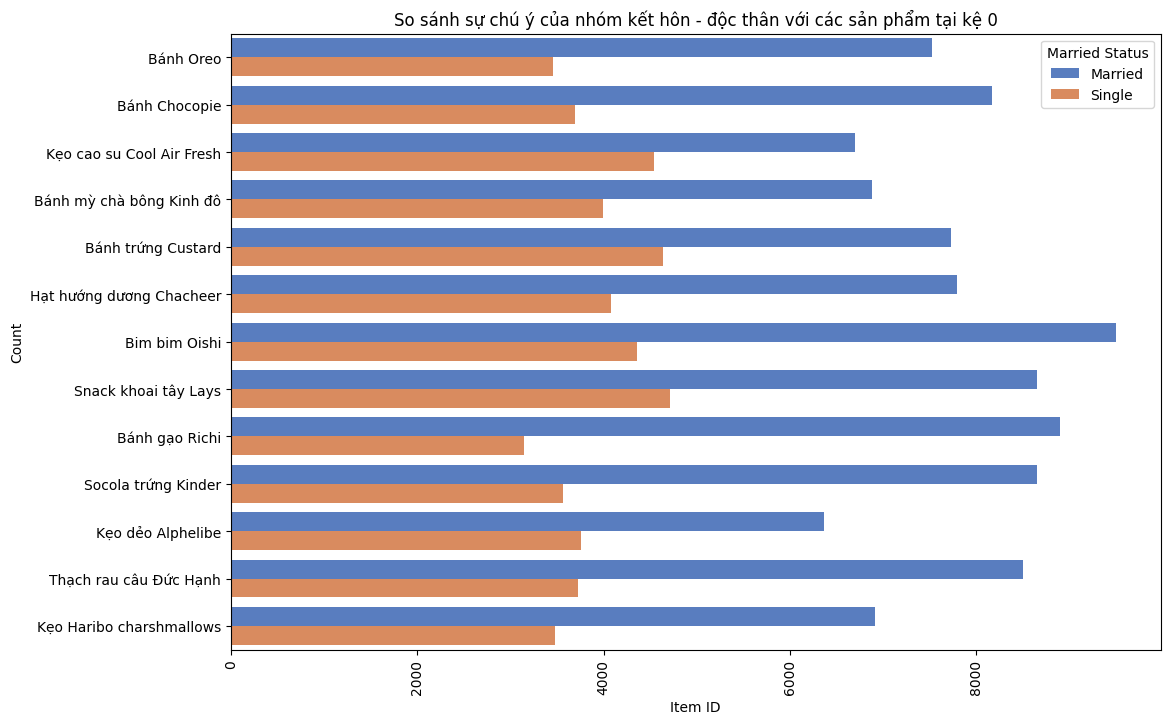

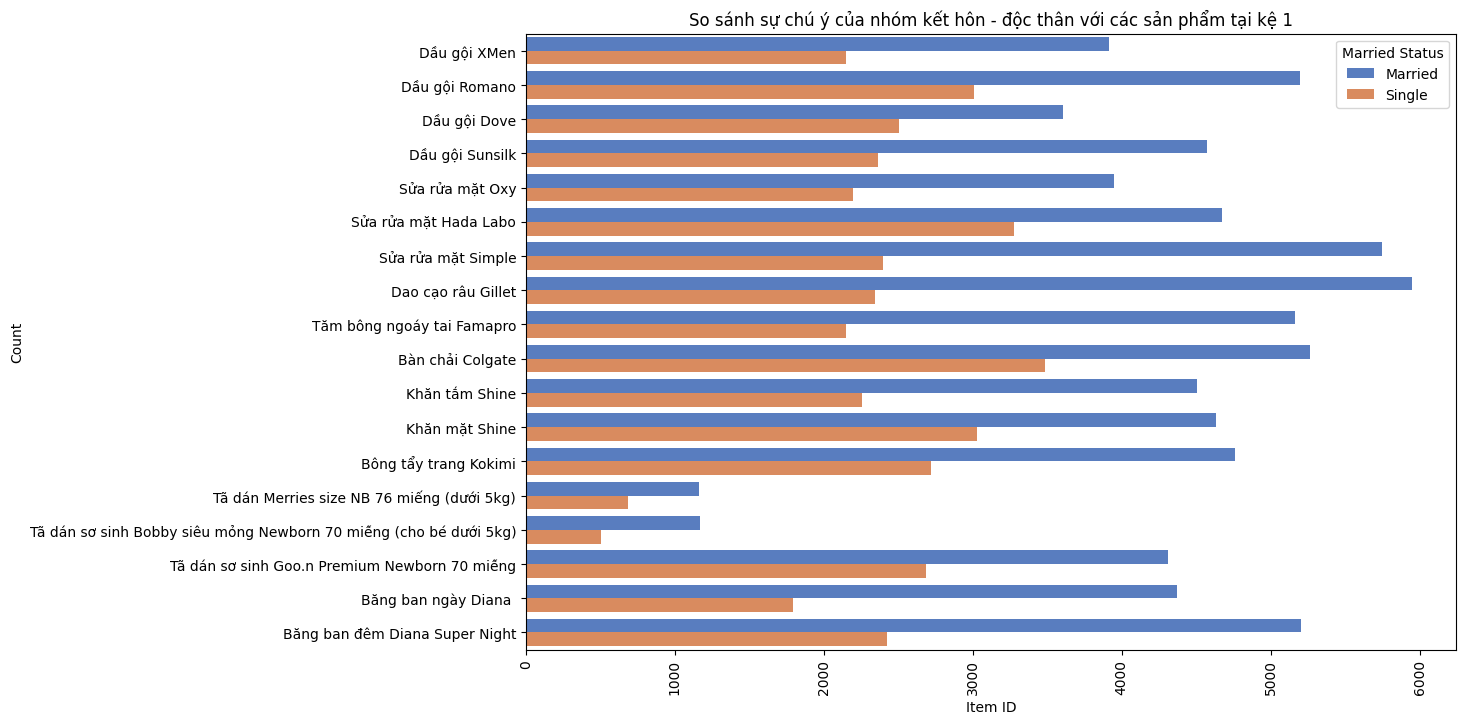

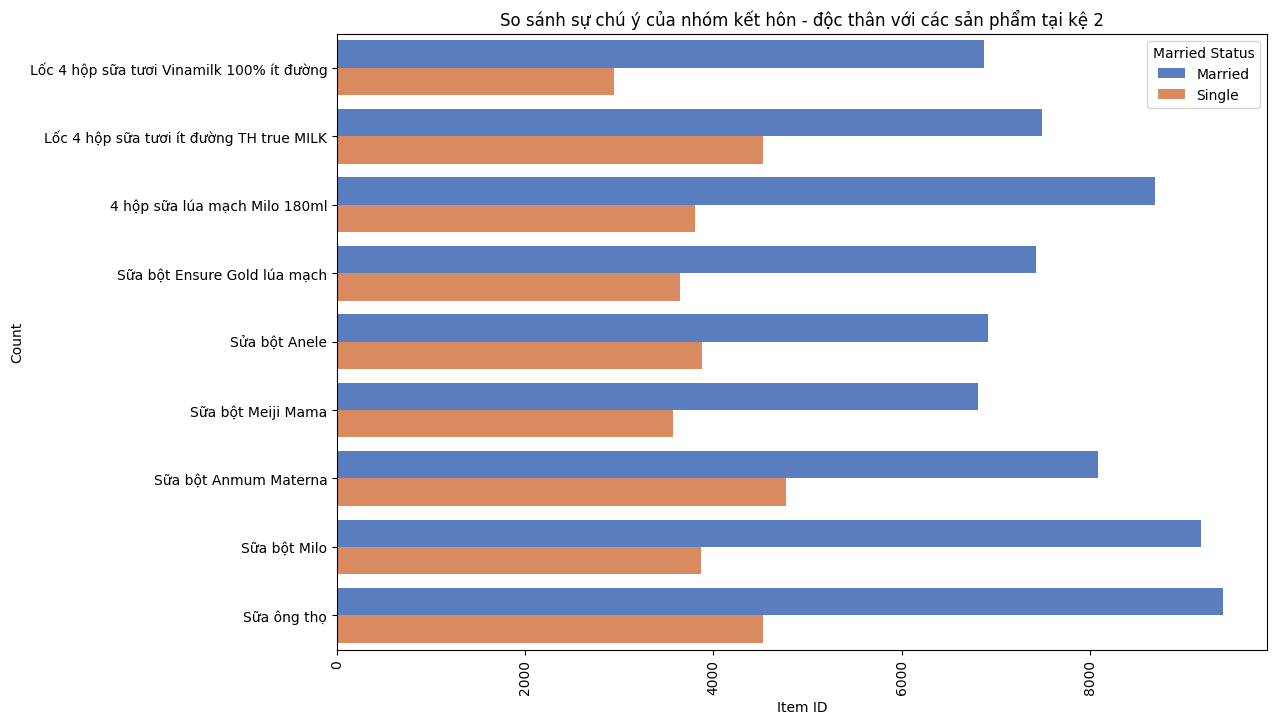

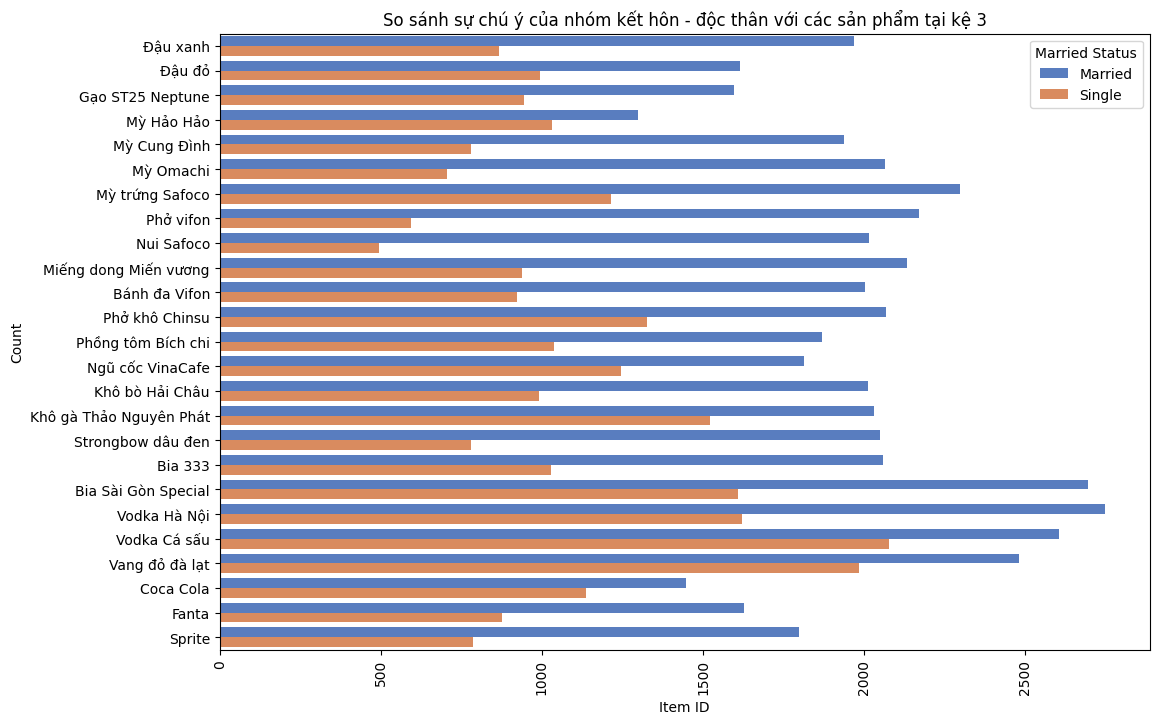

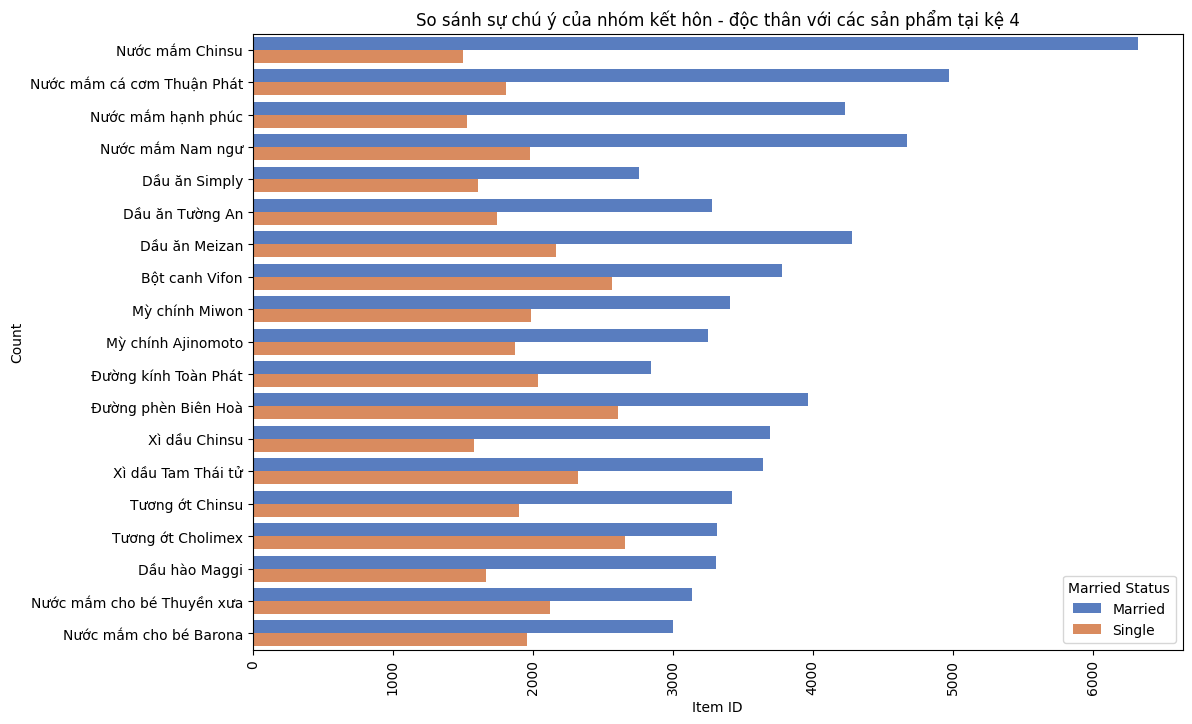

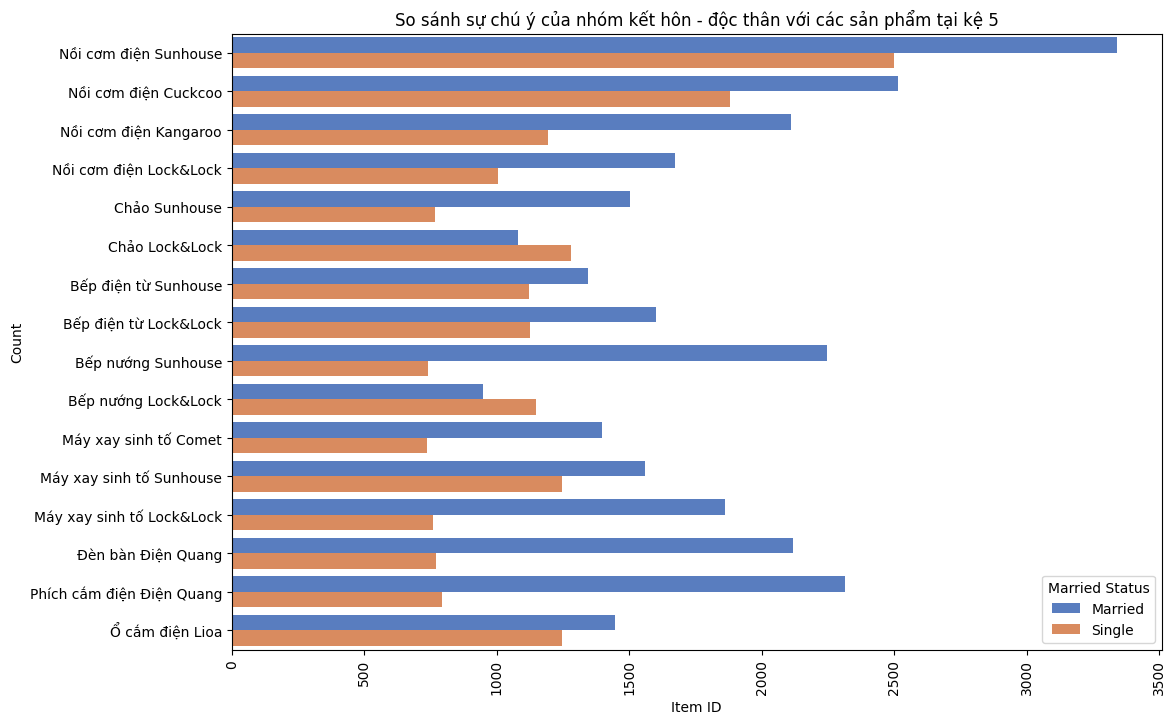

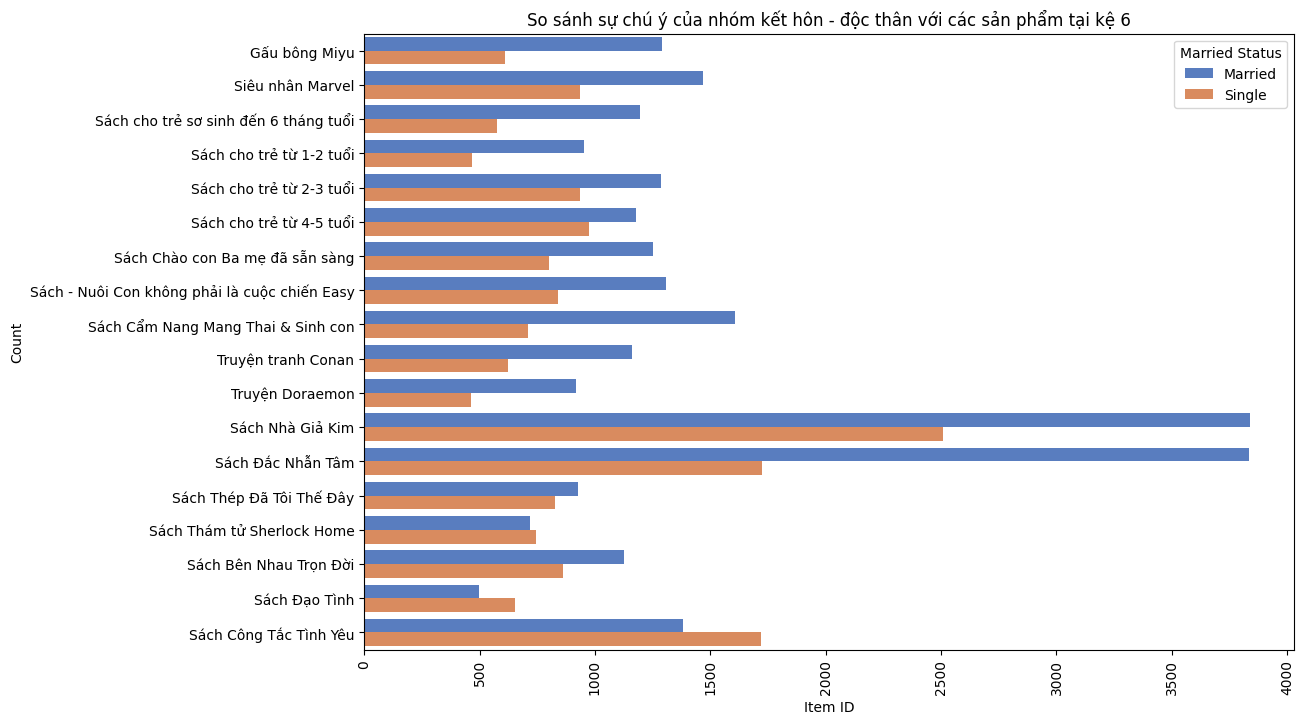

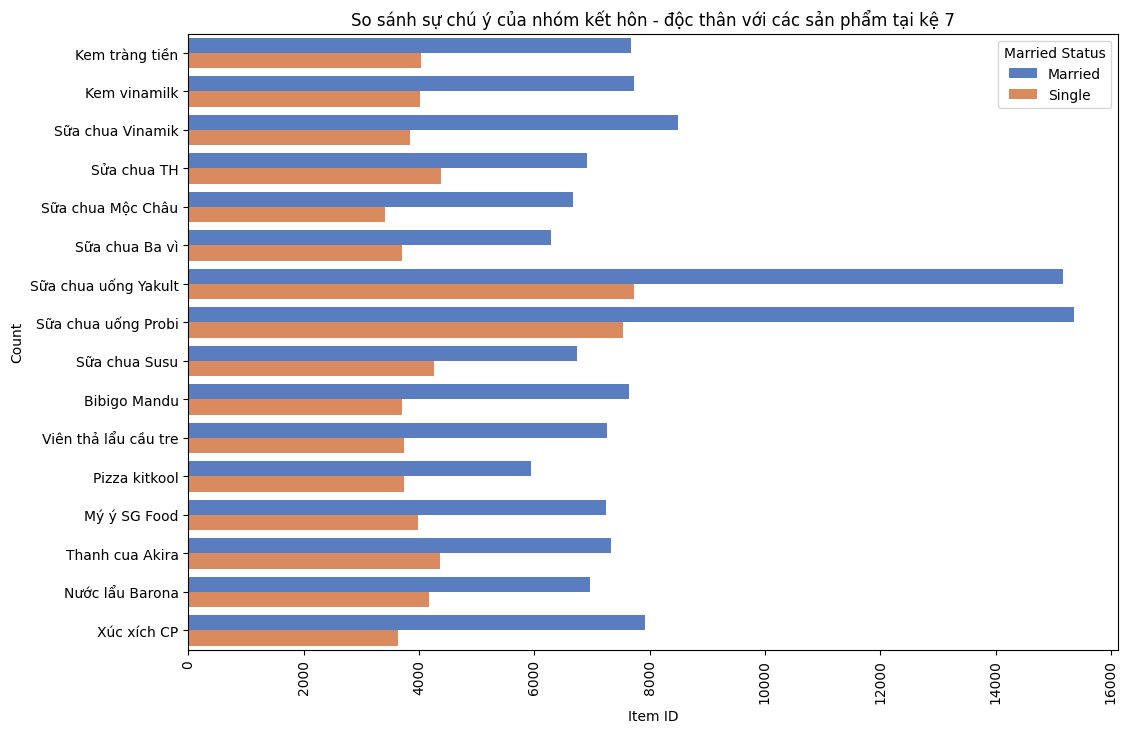

In [44]:
for i in range(8):
    married_count_item = customer_dataset[customer_dataset['Shelf ID']== i]
    married_count_item = married_count_item.groupby(['Shelf ID', 'Item ID', 'Married status', 'Name'])['total_time'].sum().reset_index()
    # Tạo biểu đồ
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=90)
    sns.barplot(data=married_count_item, y='Name', x='total_time', hue='Married status', palette='muted', ci = None)
    plt.title(f'So sánh sự chú ý của nhóm kết hôn - độc thân với các sản phẩm tại kệ {i}' )
    plt.ylabel('Count')
    plt.xlabel('Item ID')
    plt.legend(title='Married Status')
    plt.show()